[id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000

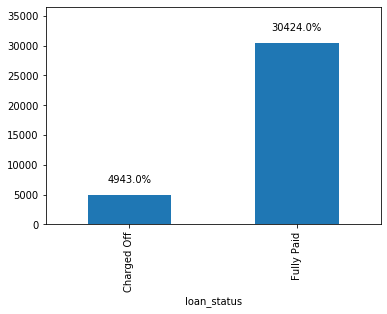

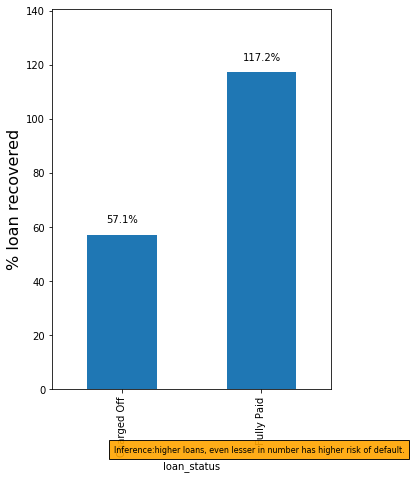

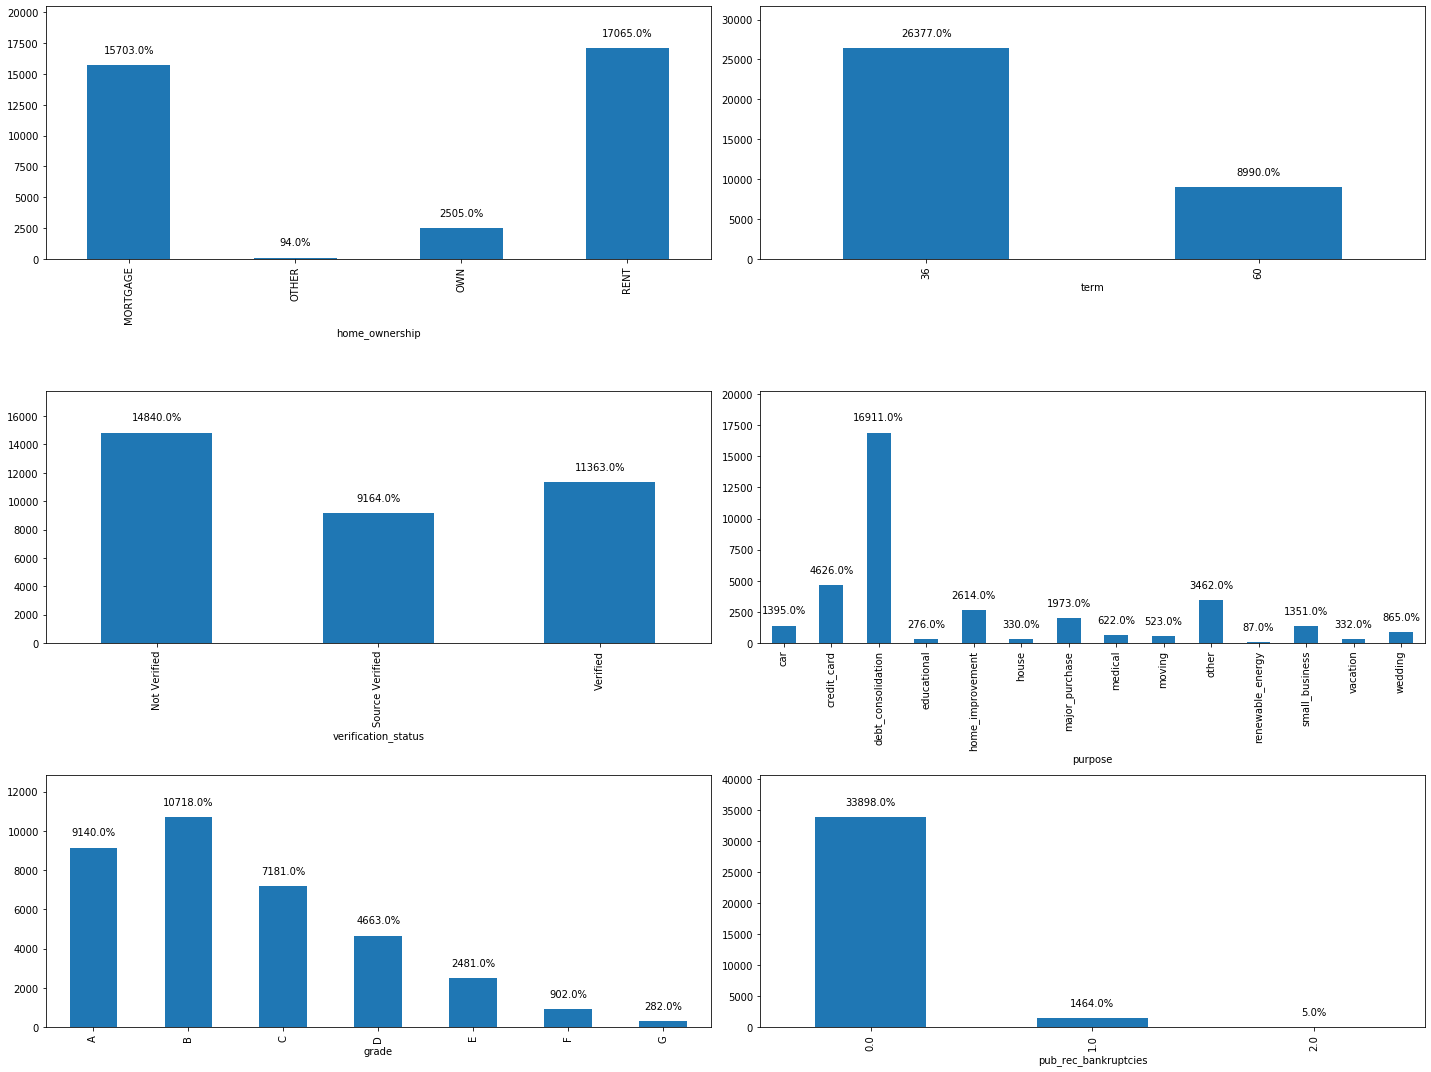

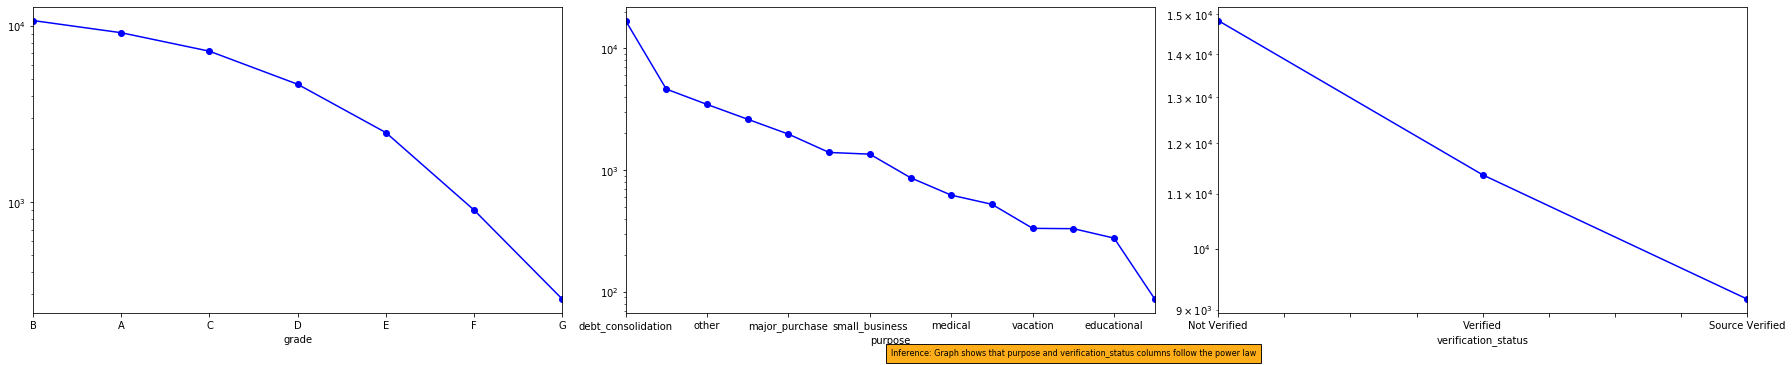

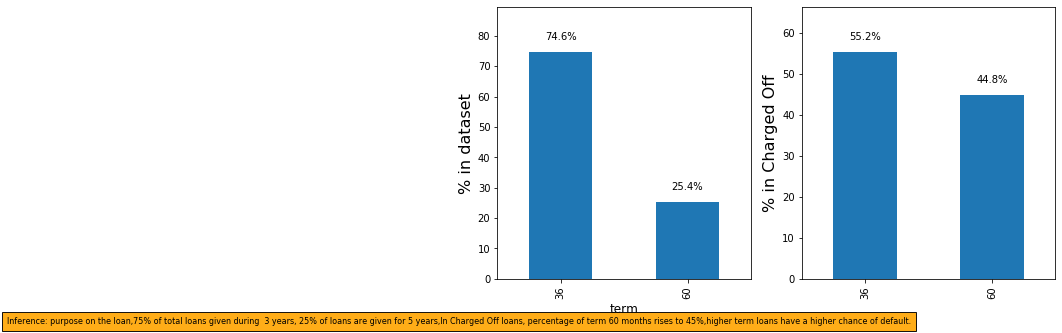

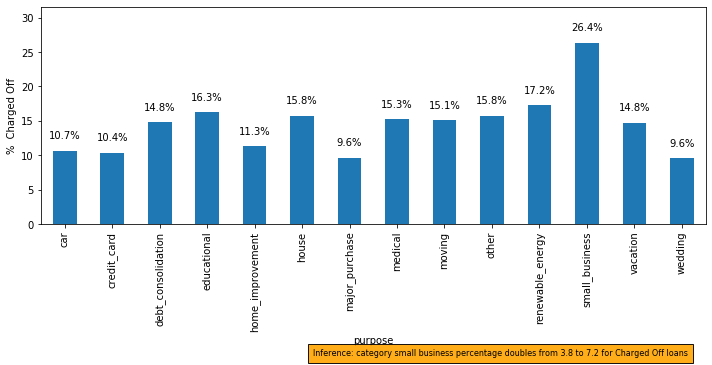

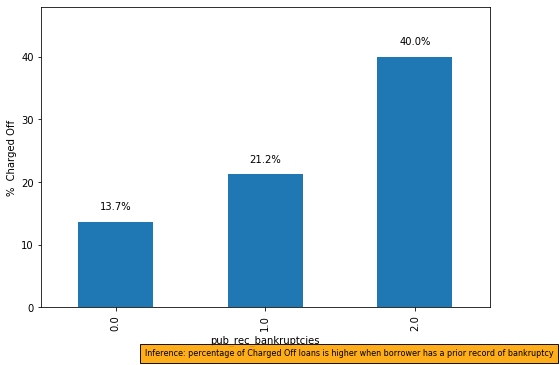

<Figure size 1080x360 with 0 Axes>

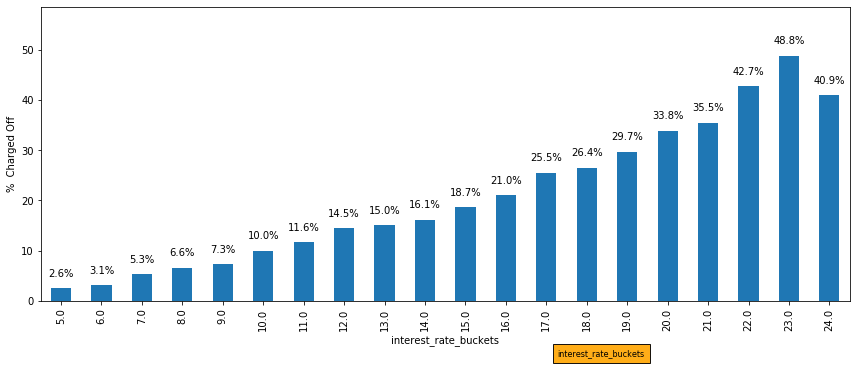

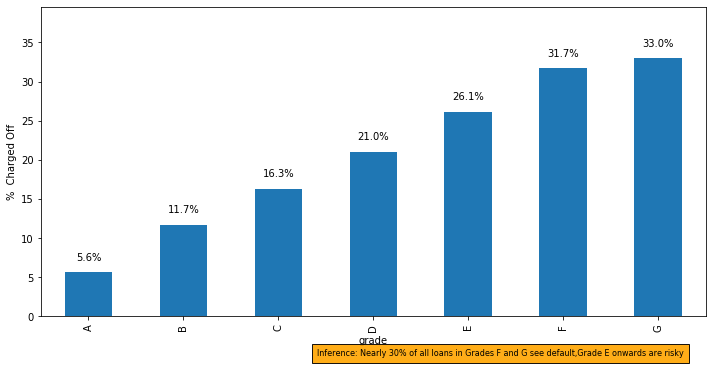

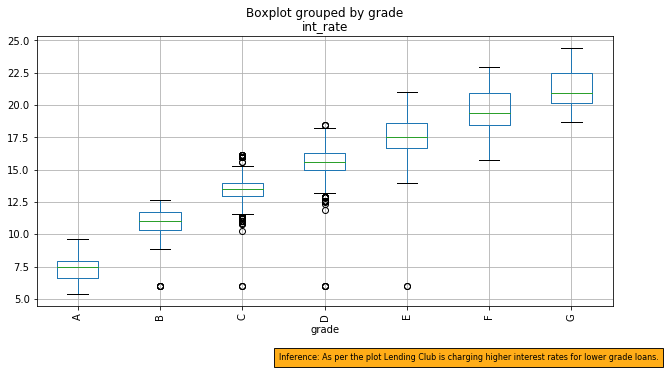

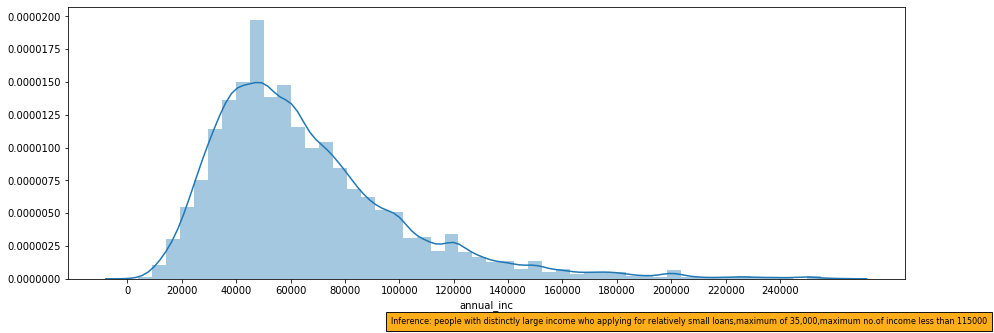

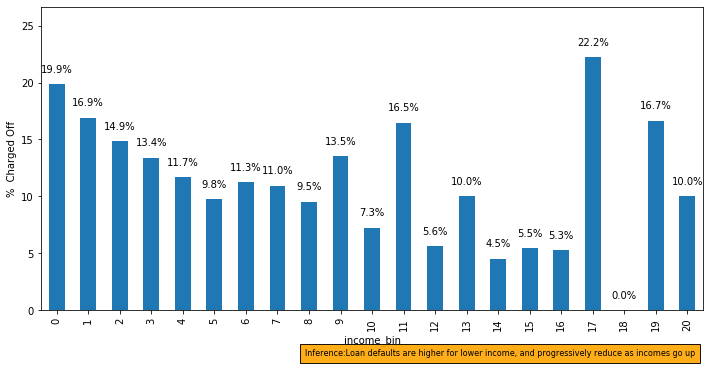

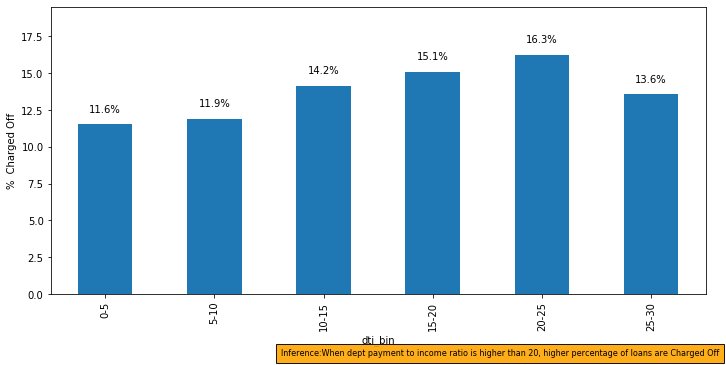

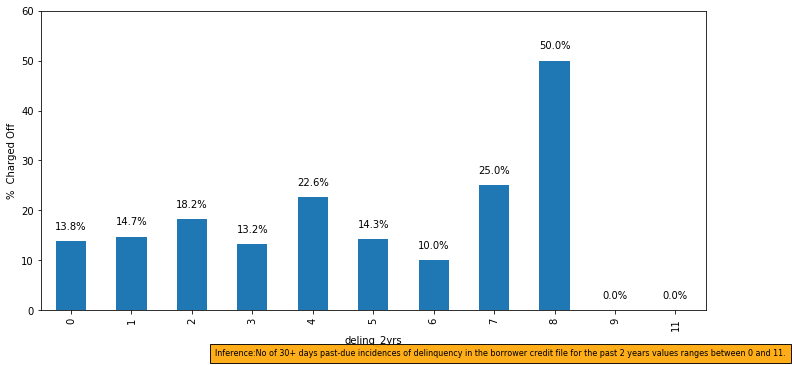

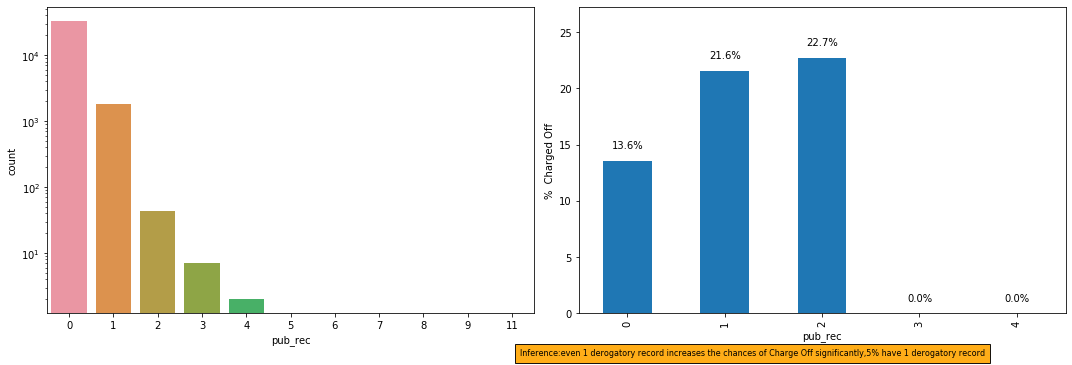

<Figure size 1080x360 with 0 Axes>

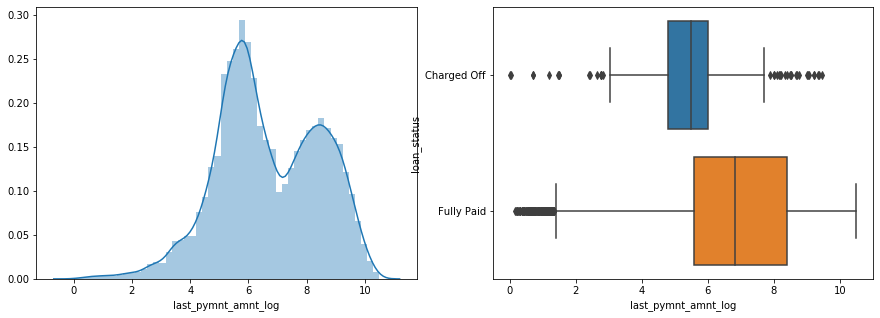

#############open_acc analysis###############
               count      mean       std  min  25%  50%   75%   max
loan_status                                                        
Charged Off   4943.0  9.308517  4.491786  2.0  6.0  9.0  12.0  38.0
Fully Paid   30424.0  9.335820  4.355764  2.0  6.0  9.0  12.0  44.0
#############revolving line utilization rate analysis############ count    35367.000000
mean        49.139015
std         28.228038
min          0.000000
25%         25.900000
50%         49.700000
75%         72.600000
max         99.900000
Name: revol_util, dtype: float64
#############credit lines analysis of borrower's############### count    35367.000000
mean        22.209206
std         11.403045
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


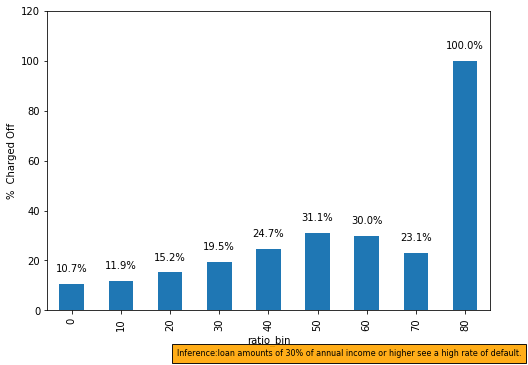

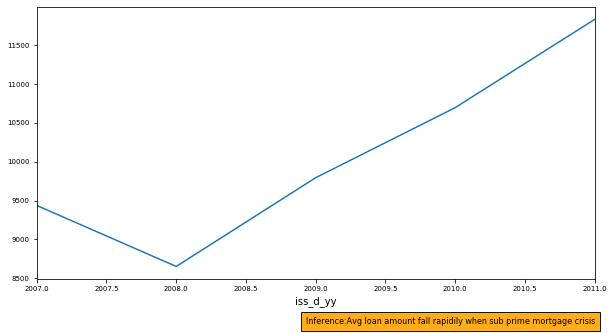

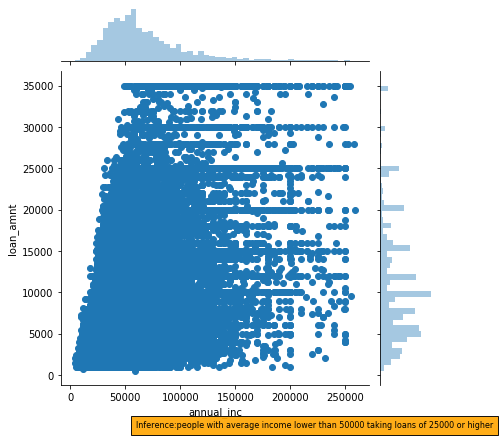

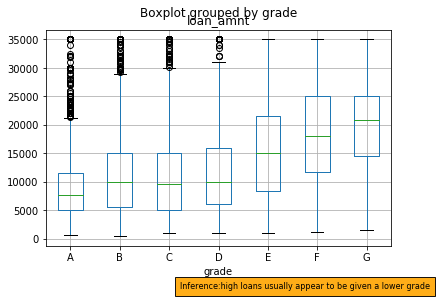

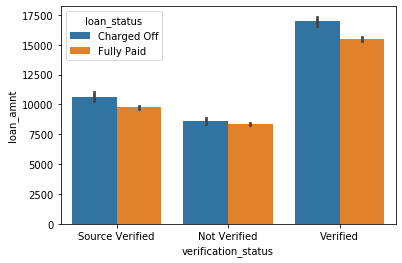

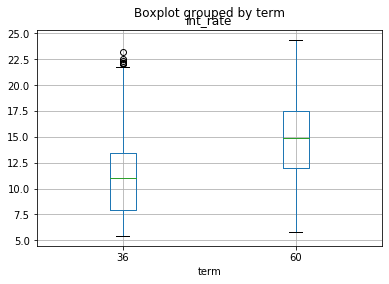

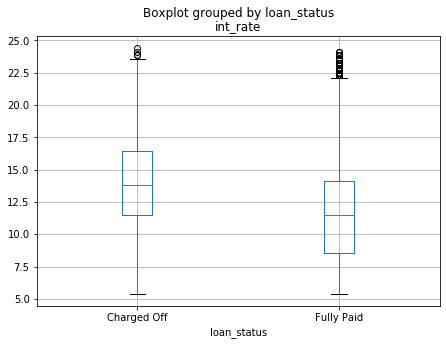

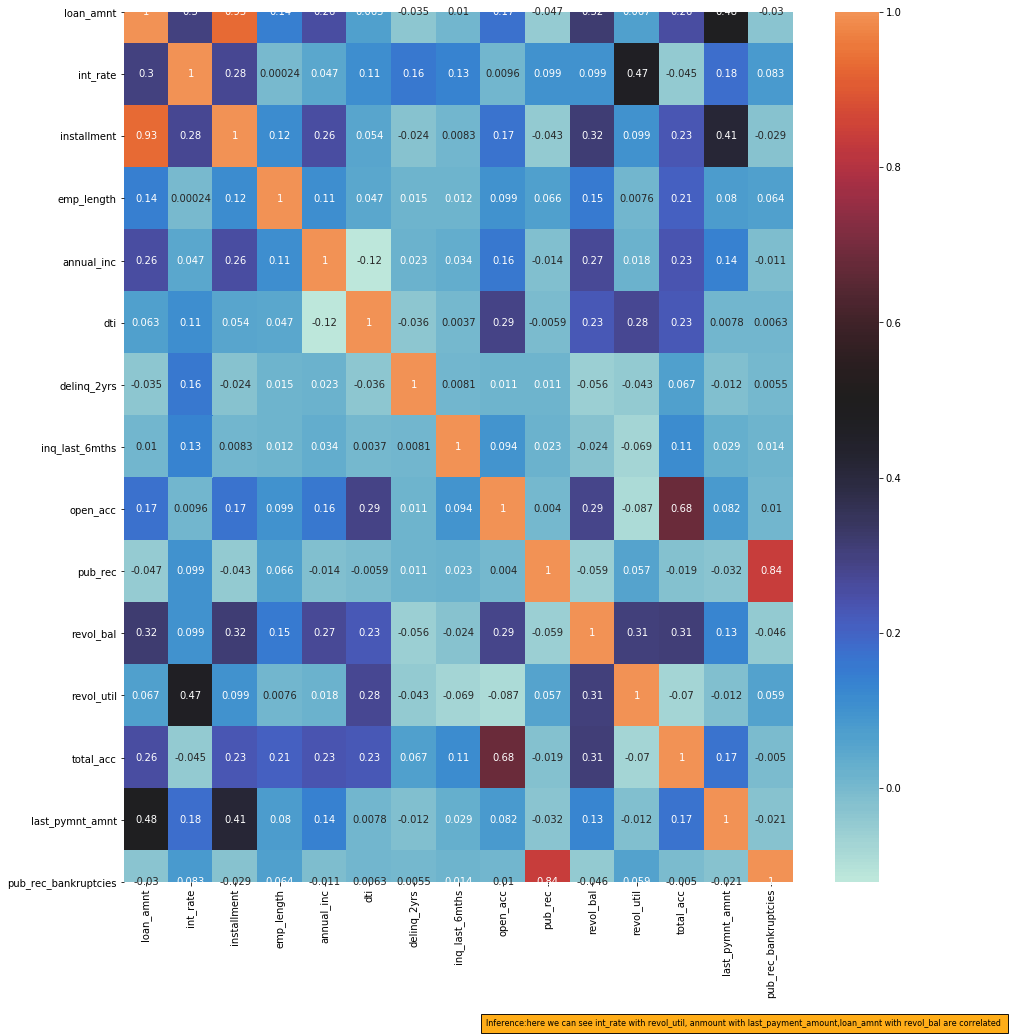

In [3]:
####################################### Imports  ##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sbn
from datetime import datetime


 
############################################ Utility methods #######################################

# This method checks the records proportion and counts in column
def check_empty_proportion(data_frame):
    empty_col_detail_perc = 100*(data_frame.isnull().sum()/len(data_frame.index))
    empty_col_detail_cnt = data_frame.isnull().sum(axis=1)
    detail_view= [empty_col_detail_perc, empty_col_detail_cnt]
    return detail_view

# This method splits numeric value of the given column name 
def col_to_float(data_frame,col_name):
    data_frame[col_name] = data_frame[col_name].apply(lambda x: pd.to_numeric(x.split("%")[0]))
    return data_frame

# This method rounds off the provided columns 
def round_col(data_frame,col_name):
    data_frame[col_name]= round(data_frame[col_name],2)
    return data_frame

# This method formats the date value of column
def col_to_date(data_frame,col_name):
    data_frame[col_name] = pd.to_datetime(data_frame[col_name], format='%b-%y')
    return data_frame

# This method extracts the month and year
def month_year(data_frame,col_name,col_month,col_year):
    # extracting month and year from issue_date
    data_frame[col_month] = data_frame[col_name].dt.month
    data_frame[col_year] = data_frame[col_name].dt.year
    return data_frame

# This method help to show label in plots
def plot_labels(ax):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        label = "{:.1f}%".format(y_value)
        plt.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, 10),         
            textcoords="offset points", 
            ha='center',                
            va='bottom')
    

        
# This method creates plot from given column using seaborn
def distributed_plot(dataframe, col1, col2):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sbn.distplot(dataframe[col1])
    plt.subplot(1, 2, 2)
    sbn.boxplot(x=dataframe[col1], y=dataframe[col2], data=dataframe)
    plt.show()

# This method return dicitonary of no. of years in string
def emp_length():
    dictionary_emp_len = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
    }
    return dictionary_emp_len

############################################ Data Cleaning ################################################

# This method preparing the data by removing unlikely to use column
def data_cleaning():
    #Data loading from csv
    actual_loan_df = pd.read_csv('loan.csv',encoding = "ISO-8859-1" ,low_memory=False)
    # There are many columns in the data where all values are NA, New df from actual_loan_df without na and 57 columns remains.
    master_frame=actual_loan_df.dropna(axis='columns',how='all')
    
    # Now remove columns which is not required for Analysis Let's check_empty_proportion,whether some rows have a large number of missing values.
    print(check_empty_proportion(master_frame))
    
    # Droping collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens has o or blank ,others with large number of recodrs blank. 
    master_frame = master_frame.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens','mths_since_last_record','next_pymnt_d'],axis=1)
    
    # mths_since_last_delinq represents months since last delinquent represents the number months passed since borrower
    # last fell into 90 DaysPastDdue group it gets generated months after the loan has been approved,so not useful at time of approval.
    # purpose and title column can be used for desc.And few other columns which may not relevent at time of application.
    master_frame = master_frame.drop('mths_since_last_delinq', axis=1)
    additional_details =  ['id','desc','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code',
                           'initial_list_status','policy_code','application_type','acc_now_delinq','recoveries','delinq_amnt','total_pymnt_inv','total_rec_int']

    master_frame = master_frame.drop(additional_details, axis=1)

    # Now ,lets clean up the data revol_util and last_pymnt_d with very less % of missing value of 0.02%, 0.13% and 0.18% respectively,
    # columns emp_title, emp_length have 6.19% and 2.71% missing value.These columns have information about the customer/borrower like their job title and 
    # title,revol_util,last_pymnt_d  gives the title of the loan specified by the borrower in the application.
    # revolving line utelization and month in which last payment was received respectively,their employment length in years.
    # pub_rec_bankruptcies categorical column with 1.76% missing data(past number of public record bankruptcies of that borrower)
    master_frame=master_frame[~master_frame.title.isnull()]
    master_frame=master_frame[~master_frame.revol_util.isnull()]
    master_frame=master_frame[~master_frame.last_pymnt_d.isnull()]
    master_frame=master_frame[~master_frame.emp_title.isnull()]
    master_frame=master_frame[~master_frame.emp_length.isnull()]
    master_frame=master_frame[~master_frame.pub_rec_bankruptcies.isnull()]
    
    # Finallly check the columns after data cleaning
    check_empty_proportion(master_frame)
    
    #master_frame.shape
    master_frame.to_csv('data_cleanup.csv', encoding='ISO-8859-1', index=False)

    return master_frame

############################################ Data_transformation ################################################

# This method transforms few of the columns which we use during analysis
def data_transformation(master_frame):
    
    #Take only value from term column
    master_frame['term'] = master_frame.term.apply(lambda x: x.split()[0])
    # Let's bin the Employment length variable into values.
    master_frame = master_frame.replace({'emp_length': emp_length() })
    
    #Time Information are as type object in the dataframe.Convert it to date and time
    master_frame=master_frame.drop_duplicates()
    master_frame= col_to_date(master_frame,'issue_d')
    master_frame= col_to_date(master_frame,'earliest_cr_line')
    master_frame= col_to_date(master_frame,'last_pymnt_d')
    master_frame= col_to_date(master_frame,'last_credit_pull_d')

    # There are certain columns with need rounding of the values up until two decimal places.
    master_frame= round_col(master_frame,'total_pymnt')
    master_frame= round_col(master_frame,'total_rec_late_fee')
    master_frame= round_col(master_frame,'collection_recovery_fee')
    
    # creating two additional column from earliest_cr_line and issue_id
    master_frame= month_year(master_frame,'earliest_cr_line','cr_line_month','cr_line_year')
    master_frame= month_year(master_frame,'issue_d','iss_d_mm','iss_d_yy')
    
    # int_rate and revol_util is character type,convert it to float value withoout '%'.
    master_frame=col_to_float(master_frame,'int_rate')
    master_frame=col_to_float(master_frame,'revol_util')
    master_frame.term.value_counts()
    # loans with status Fully Paid ,Charged Off  used for analysis, so we will remove the "current status".
    master_frame = master_frame[master_frame['loan_status'].isin(['Fully Paid','Charged Off'])]

    # summarise the values
    master_frame.to_csv('data_transformation.csv',encoding='ISO-8859-1', index=False)
    #master_frame['loan_status'].value_counts()    
    return master_frame

################################################ Data-analysis ###################################################

#Analysis is to identify variables for approval/rejection of the loan time of loan application and Data dictionary.
    # 1. demographic variables 
    # 2. loan characteristics amount of loan, interest rate, purpose of loan etc
    # 3. Customer behaviour variables
    

# This method prints two plots side by side 
def plot_percentages(master_frame, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_frame[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar()
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    plot_labels(ax)
    plt.subplot(1, 2, 2)
    values = (master_frame.loc[master_frame['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar()
    ax.set_ylabel('% in Charged Off', fontsize=16)
    plot_labels(ax)
    
# This method prints plots with loan_status   
def loanStatus(dataframe, by, loanstatus='Charged Off'):
    groupby = dataframe.groupby(['loan_status',by])[by].count()
    count = dataframe.groupby(by)[by].count()
    percentages = groupby.unstack() * 100 / count.T
    ax = percentages.loc[loanstatus].plot.bar()
    #color=sbn.color_palette('husl', 16)
    ax.set_ylabel('%  ' + loanstatus)
    plot_labels(ax)
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax   

# This method plots categorical variables 
def other_category_plot(df, arr):
    plt.figure(figsize=(20,15))
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar()
        plot_labels(ax)
    plt.tight_layout()

# This method plots the representation of power_law part of univariate analysis
def power_law_analysis(master_frame):
    plt.figure(figsize=(25,5))
    plt.figtext(0.7, 0, "Inference: Graph shows that purpose and verification_status columns follow the power law", ha="right",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    plt.subplot(1, 3, 1)
    master_frame.groupby('grade').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
    plt.subplot(1, 3, 2)
    master_frame.groupby('purpose').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
    plt.subplot(1, 3, 3)
    master_frame.groupby('verification_status').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
    plt.tight_layout()
    #Inference: Graph shows that purpose and verification_status columns follow the power law"

# This method plots multiple variables for univariate analysis
def other_loan_variables(master_frame):
    plt.figure(figsize=(10,5))
    plt.figtext(0.7, 0, "Inference: purpose on the loan,75% of total loans given during  3 years, 25% of loans are given for 5 years,In Charged Off loans, percentage of term 60 months rises to 45%,higher term loans have a higher chance of default.", ha="right",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    plot_percentages(master_frame, 'term')
    #Inference:75% of total loans given during  3 years, 25% of loans are given for 5 years.
    #Inference:In Charged Off loans, percentage of term 60 months rises to 45%,higher term loans have a higher chance of default."
    
    plt.figure(figsize=(10,5))
    plt.figtext(0.7, 0, "Inference: category small business percentage doubles from 3.8 to 7.2 for Charged Off loans", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    loanStatus(master_frame, 'purpose')
    #Inference: purpose on the loan')
    #Inference:category small business percentage doubles from 3.8 to 7.2 for Charged Off loans"
    
    plt.figure(figsize=(7,5))
    plt.figtext(0.7, 0, "Inference: percentage of Charged Off loans is higher when borrower has a prior record of bankruptcy", ha="center", fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    loanStatus(master_frame, 'pub_rec_bankruptcies')
    #Inference: percentage of Charged Off loans is markedly higher when borrower has a prior record of bankruptcy

    plt.figure(figsize=(15,5))
    plt.figtext(0.7, 0, "Inference: installment amount varies between 170.08 to 420 with median of 280 & loans Charged Off have high installment on average", ha="center", fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    master_frame.groupby('loan_status')['int_rate'].describe()
    #intrest rate for Charged Off loans varies from 5.42% to 24.4% with average intrest rate of 11.8%.
    #The monthly payment owed by the borrower if the loan originates.')
    
    master_frame['interest_rate_buckets'] = round(master_frame['int_rate'])
    plt.figure(figsize=(12,5))
    plt.figtext(0.7, 0, "interest_rate_buckets", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    loanStatus(master_frame, 'interest_rate_buckets')
    
    master_frame.groupby('loan_status')['installment'].describe()
    #Inference: installment amount varies largely between 170.08 to 420 with median of 280 & loans Charged Off have high installment on average'
    
    #Lending Club assigned loan grade and subgrade'
    plt.figure(figsize=(10,5))
    plt.figtext(0.7, 0, "Inference: Nearly 30% of all loans in Grades F and G see default,Grade E onwards are risky", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    loanStatus(master_frame, 'grade')
    #Inference: Nearly 30% of all loans in Grades F and G see a default.
    #Inference: Grade E onwards are risky. Lending Club should either refuse loans or charge high interest rates.
    
    #grade analysis
    fig, ax = plt.subplots(figsize=(10,5))
    plt.figtext(0.7, 0, "Inference: As per the plot Lending Club is charging higher interest rates for lower grade loans.", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    master_frame.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)
    #Inference: As per the plot Lending Club is charging higher interest rates for lower grade loans.
    
    #annual income analysis
    #Calculate Median,remove outliers,and fit in correct sdtandard deviation
    master_frame.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
    master_frame_wtht_outlier = master_frame[np.abs(master_frame.annual_inc-master_frame.annual_inc.mean()) <= (3*master_frame.annual_inc.std())]
    plt.figure(figsize=(15, 5))
    plt.figtext(0.7, 0, "Inference: people with distinctly large income who applying for relatively small loans,maximum of 35,000,maximum no.of income less than 115000", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    sbn.distplot(master_frame_wtht_outlier['annual_inc'], hist_kws={'log':False})
    plt.xticks(np.arange(0, 260000, 20000))
    plt.show()
    #Inference: Annual income of borrowers falls in 4,000 to 6,000,000.people with large income who applying for relatively small loans, maximum of 35,000,maximum no.of income less than 115000.
    
    #Create Derived categorical variable
    master_frame['income_bin'] = master_frame['annual_inc']/20000
    master_frame['income_bin'] = master_frame['income_bin'].astype(int)
    plt.figure(figsize=(10,5))
    plt.figtext(0.7, 0, "Inference:Loan defaults are higher for lower income, and progressively reduce as incomes go up", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    ax = loanStatus(master_frame.loc[master_frame['income_bin']<21], 'income_bin')
    #Inference :Loan defaults are higher for lower income, and progressively reduce as incomes go up.
    
    #dti analysis
    master_frame['dti_bin'] = pd.cut(master_frame['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
    plt.figure(figsize=(10,5))
    plt.figtext(0.7, 0, "Inference:When dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    loanStatus(master_frame, 'dti_bin')
    #Inference: dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off'

    #delinq_2yrs analysis
    plt.figure(figsize=(10,5))
    plt.figtext(0.7, 0, "Inference:No of 30+ days past-due incidences of delinquency in the borrower credit file for the past 2 years values ranges between 0 and 11.", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    loanStatus(master_frame, 'delinq_2yrs')
    #Inference: No of 30+ days past-due incidences of delinquency in the borrower credit file for the past 2 years values ranges between 0 and 11. 

    #derogatory public records analysis
    plt.figure(figsize=(15,5))
    plt.figtext(0.7, 0, "Inference:even 1 derogatory record increases the chances of Charge Off significantly,5% have 1 derogatory record", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    plt.subplot(1, 2, 1)
    count=sbn.countplot(master_frame['pub_rec'], order=sorted(master_frame.delinq_2yrs.unique()))
    count.set_yscale('log')
    plt.subplot(1, 2, 2)
    loanStatus(master_frame, 'pub_rec')
    plt.show()
    #Inference: 94% have no Public derogatory records. 5% have 1 derogatory record. even 1 derogatory record increases the chances of Charge Off significantly.


    #last total payment amount received analysis
    #The value vary a lot. convert into log scale and plot to find trend.
    master_frame['last_pymnt_amnt_log'] = master_frame['last_pymnt_amnt'].apply(lambda x : np.log(x+1))
    plt.figure(figsize=(15,5))
    plt.figtext(0.7, 0, "Inference:last Payment amount received is visibily lower for Charged Off loans compared to Fully Paid loans,expected in case of charged of loans.", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    distributed_plot(master_frame, 'last_pymnt_amnt_log','loan_status')
    #Inference:last Payment amount received is visibily lower for Charged Off loans compared to Fully Paid loans,expected in case of charged of loans.
    
    
    #Analysis of ratio of loan amount to annual income
    master_frame['ratio'] = master_frame['loan_amnt'] * 10 / master_frame['annual_inc']
    master_frame['ratio_bin'] = (master_frame['ratio'].astype(int)) * 10
    plt.figure(figsize=(7,5))
    plt.figtext(0.7, 0, "Inference:loan amounts of 30% of annual income or higher see a high rate of default.", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    loanStatus(master_frame, 'ratio_bin')
    #Inference:loan amounts of 30% of annual income or higher can a high rate of default.
    
    #open_acc analysis
    print("#############open_acc analysis###############")
    print(master_frame.groupby('loan_status')['open_acc'].describe())
    #Inference: no significant difference in the credit lines of charged off and fully paid loans.
    
    #revolving line utilization rate analysis
    print("#############revolving line utilization rate analysis############",master_frame.revol_util.describe())
    #Inference: % utilization rate is 49 & revolving Utilisation rate is to be higher for Charged Off loans than the Fully Paid loans.
    
    #credit lines analysis of borrower's 
    print("#############credit lines analysis of borrower's###############",master_frame.total_acc.describe())
    #Inference: 22 of average credit lines foother_loan_variablesr the borrower's. There is no significant diff in the Charged Off and Fully Paid credit lines
    
    return master_frame

# This method is used for univariate segmented analysis    
def univariate_segmented_analysis(master_frame):
    ax = master_frame.groupby('loan_status').loan_amnt.count().plot.bar()
    plot_labels(ax)
    cnt_charged_of = master_frame.loc[master_frame['loan_status'] == 'Charged Off'].loan_status.count()
    cnt_charged_of* 100/len(master_frame)
    plt.figure(figsize=(5,7))
    plt.figtext(0.7, 0, "Inference:higher loans, even lesser in number has higher risk of default.", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    ax = (master_frame.groupby('loan_status').total_pymnt.sum() * 100 / master_frame.groupby('loan_status').loan_amnt.sum()).plot.bar()
    ax.set_ylabel('% loan recovered', fontsize=16)
    plt.margins(0.2, 0.2)
    plot_labels(ax)
    
    master_frame.groupby('loan_status')['loan_amnt'].describe()
    
    other_category_plot(master_frame, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])
    
    power_law_analysis(master_frame)
    
    other_loan_variables(master_frame)
    #Inference:Most of the loans are below 20other_loan_variables000 amount, higher loans, even lesser in number has higher risk of default.
    #Inference:Plot shows Lending Club only recovers 57% in case of defaults whereas makes 17 % profit on fully paid',Display amount of the loan applied for by the borrower.
    #Inference:multiple loans are of 36 month term,Very few loans are extended to people with prior record of bankruptcy,debt_consolidation is by far the largest 'purpose' for seeking a loan
    #Inference:Most approved loans are high grade We should investigate the frequencies of defaults by term, purpose and prior record of bankruptcy
 
    return master_frame

# This method is used for bivariate analysis
def bivariate_analysis(master_frame):
    # average of loan amount over time anaysis
    plt.figure(figsize=(10,5))
    plt.figtext(0.7, 0, "Inference:Avg loan amount fall rapidily when sub prime mortgage crisis", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    master_frame.groupby('iss_d_yy').loan_amnt.mean().plot(kind='line', fontsize=7)
    plt.show()
    #Inference:Avg loan amount fall rapidily when sub prime mortgage crisis"
    
    #loan_amnt and annual_inc analysis 
    sbn.jointplot('annual_inc', 'loan_amnt', master_frame.loc[master_frame['annual_inc']<260000])
    plt.figtext(0.7, 0, "Inference:people with average income lower than 50000 taking loans of 25000 or higher", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    plt.show()
    #Inference:people with average income lower than 50000 taking loans of 25000 or higher"

    #loan_amnt and grade analysis 
    master_frame.boxplot(column='loan_amnt', by='grade')
    plt.figtext(0.7, 0, "Inference:high loans usually appear to be given a lower grade", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    plt.show()
    #Inference:high loans usually appear to be given a lower grade", ha="center"median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan
    
    
    #loan_amnt,verification_status and loan status
    sbn.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=master_frame, estimator=np.mean)
    #Inference:higher loan amounts are riskier and are also verified more often by Lending Club
   
    #interest Rate and term analysis
    master_frame.boxplot(column='int_rate', by='term')
    plt.show()
    #Inference: intrest rates besed on term,higher term provided for larger amounts,so intrest is high too.
    
    #interest rate and sub grade analysis 
    master_frame.boxplot(column='int_rate', by='loan_status',figsize=(7,5))
    #Inference: higher interest rate increse chance to be Charged Off.
    
    #correlation analysis 
    plt.figure(figsize=(15,16))
    plt.figtext(0.7, 0, "Inference:here we can see int_rate with revol_util, anmount with last_payment_amount,loan_amnt with revol_bal are correlated ", ha="center",fontsize=8, bbox={"facecolor":"orange", "alpha":0.9, "pad":5})
    variables= ['loan_amnt', 'int_rate', 'installment',
           'emp_length', 'annual_inc',
           'dti', 'delinq_2yrs', 'earliest_cr_line',
           'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
           'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
           'pub_rec_bankruptcies']
    correlation = master_frame[variables].corr()
    sbn.heatmap(correlation, annot=True, center=0.5)
    #Inference:here we can see int_rate with revol_util, anmount with last_payment_amount,loan_amnt with revol_bal are correlated 
    #int_rate is correlated with revol_util with r factor of .47,as company is charging higher interest from riskier loan.
    #loan_amnt revol_bal are correlated with r factor .35 it suggests that higher loan amount is being approved to riskier borrowers.
    
# Main method which will execute the required business steps
def main():
    
    # data cleaning
    master_frame=data_cleaning()
    master_frame=data_transformation(master_frame)
    univariate_segmented_analysis(master_frame)
    bivariate_analysis(master_frame)
    
if __name__ == '__main__':
    main()  